In [19]:
from pathlib import Path
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [20]:
csv_file = Path("Copied_data/daily_tests_vs_new_cases.csv")

In [21]:
file_df = pd.read_csv(csv_file)
file_df.head()


,Entity,Code,year,Day,new_tests_per_thousand_7day_smoothed,142753-annotations,"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)",Continent
0,Afghanistan,AFG,2022,5/02/2022,32.0,NaN,14.936,Asia
1,Afghanistan,AFG,2022,6/02/2022,32.0,NaN,14.053,Asia
2,Afghanistan,AFG,2022,7/02/2022,32.0,NaN,14.071,Asia
3,Afghanistan,AFG,2022,8/02/2022,32.0,NaN,14.498,Asia
4,Afghanistan,AFG,2022,9/02/2022,32.0,NaN,13.960,Asia


In [22]:
file_df.count()

Entity                                                                                             318338
Code                                                                                               300390
year                                                                                               318338
Day                                                                                                318338
new_tests_per_thousand_7day_smoothed                                                               103965
142753-annotations                                                                                  97301
Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)    316576
Continent                                                                                          299108
dtype: int64

In [23]:
#drop rowsa with incorrect country label
file_df.dropna(subset=["Code"], inplace=True)
file_df.count()

Entity                                                                                             300390
Code                                                                                               300390
year                                                                                               300390
Day                                                                                                300390
new_tests_per_thousand_7day_smoothed                                                               103599
142753-annotations                                                                                  96935
Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)    298628
Continent                                                                                          299108
dtype: int64

In [24]:
#drop rows with country code OWID_WRL
file_df.drop(file_df[file_df["Code"] == "OWID_WRL"].index, inplace=True)
file_df.count()

Entity                                                                                             299108
Code                                                                                               299108
year                                                                                               299108
Day                                                                                                299108
new_tests_per_thousand_7day_smoothed                                                               103599
142753-annotations                                                                                  96935
Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)    297346
Continent                                                                                          299108
dtype: int64

In [25]:
#dropping cells with nan in specific field 
file_df.dropna(subset=["new_tests_per_thousand_7day_smoothed"], inplace=True)
file_df.count()

Entity                                                                                             103599
Code                                                                                               103599
year                                                                                               103599
Day                                                                                                103599
new_tests_per_thousand_7day_smoothed                                                               103599
142753-annotations                                                                                  96935
Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)    101837
Continent                                                                                          103599
dtype: int64

In [26]:
#dropping cells with nan in specific field 
file_df.dropna(subset=["Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)"], inplace=True)
file_df.count()

Entity                                                                                             101837
Code                                                                                               101837
year                                                                                               101837
Day                                                                                                101837
new_tests_per_thousand_7day_smoothed                                                               101837
142753-annotations                                                                                  95179
Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)    101837
Continent                                                                                          101837
dtype: int64

In [30]:
#Renaming two columns for consistency and readability
cleaned_df = file_df.rename(columns={"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)": "Daily_new_confirmed_cases_per_million", "new_tests_per_thousand_7day_smoothed": "new_tests_per_million_smoothed"})
cleaned_df.head()

,Entity,Code,year,Day,new_tests_per_million_smoothed,142753-annotations,Daily_new_confirmed_cases_per_million,Continent
0,Afghanistan,AFG,2022,5/02/2022,32.0,NaN,14.936,Asia
1,Afghanistan,AFG,2022,6/02/2022,32.0,NaN,14.053,Asia
2,Afghanistan,AFG,2022,7/02/2022,32.0,NaN,14.071,Asia
3,Afghanistan,AFG,2022,8/02/2022,32.0,NaN,14.498,Asia
4,Afghanistan,AFG,2022,9/02/2022,32.0,NaN,13.960,Asia


In [31]:
#convert data type of day column to datetime
cleaned_df['Day'] = pd.to_datetime(cleaned_df['Day'])
cleaned_df.head()

,Entity,Code,year,Day,new_tests_per_million_smoothed,142753-annotations,Daily_new_confirmed_cases_per_million,Continent
0,Afghanistan,AFG,2022,2022-05-02,32.0,NaN,14.936,Asia
1,Afghanistan,AFG,2022,2022-06-02,32.0,NaN,14.053,Asia
2,Afghanistan,AFG,2022,2022-07-02,32.0,NaN,14.071,Asia
3,Afghanistan,AFG,2022,2022-08-02,32.0,NaN,14.498,Asia
4,Afghanistan,AFG,2022,2022-09-02,32.0,NaN,13.960,Asia


In [32]:
#sort dataframe by specific date 
sorted_df = cleaned_df.loc[(cleaned_df["Day"]=="2021-02-02")]
sorted_df.head()   

,Entity,Code,year,Day,new_tests_per_million_smoothed,142753-annotations,Daily_new_confirmed_cases_per_million,Continent
2900,Albania,ALB,2021,2021-02-02,1251.0,tests performed,294.176,Europe
6544,Andorra,AND,2021,2021-02-02,7554.0,people tested,672.749,Europe
10376,Antigua and Barbuda,ATG,2021,2021-02-02,2199.0,tests performed,50.274,North America
11929,Argentina,ARG,2021,2021-02-02,1094.0,tests performed,177.043,South America
13178,Armenia,ARM,2021,2021-02-02,659.0,tests performed,51.327,Asia


In [33]:
sorted_df.count()

Entity                                   121
Code                                     121
year                                     121
Day                                      121
new_tests_per_million_smoothed           121
142753-annotations                       115
Daily_new_confirmed_cases_per_million    121
Continent                                121
dtype: int64

In [34]:
sorted_df.tail()

,Entity,Code,year,Day,new_tests_per_million_smoothed,142753-annotations,Daily_new_confirmed_cases_per_million,Continent
299439,United States,USA,2021,2021-02-02,4637.0,tests performed,427.495,North America
300698,United States Virgin Islands,VIR,2021,2021-02-02,699.0,NaN,114.884,North America
303264,Uruguay,URY,2021,2021-02-02,1917.0,people tested,171.330,South America
316087,Zambia,ZMB,2021,2021-02-02,514.0,tests performed,63.487,Africa
317321,Zimbabwe,ZWE,2021,2021-02-02,200.0,tests performed,16.649,Africa


In [35]:
#Creating a list of each of the columns in the sorted dataframe that will be needed for plotting
country = list(sorted_df.Entity)
continent = list(sorted_df.Continent)
tests = list(sorted_df.new_tests_per_million_smoothed)
cases = list(sorted_df.Daily_new_confirmed_cases_per_million)

#sorting the values tests and cases values their continent
tests_by_cont = {'Africa':[], 'Asia':[], 'Europe':[], 'North America':[], 'Oceania':[], 'South America':[]}
cases_by_cont = {'Africa':[], 'Asia':[], 'Europe':[], 'North America':[], 'Oceania':[], 'South America':[]}

for i in range(len(country)):
    cont = continent[i]
    tests_by_cont[cont].append(tests[i])
    cases_by_cont[cont].append(cases[i])


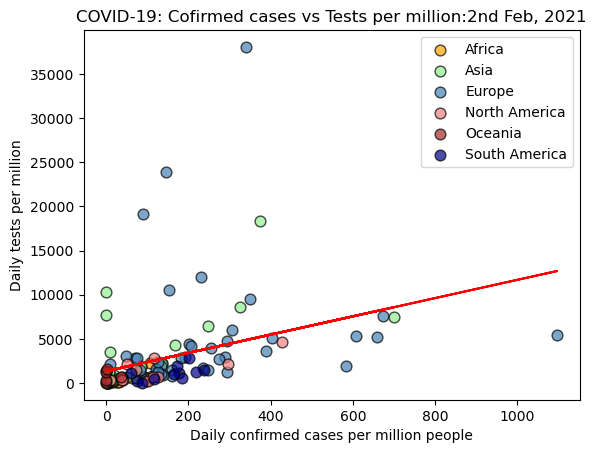

<Figure size 640x480 with 0 Axes>

In [36]:
#plotting a scatter plot of covid 19 cases vs tests per pillion by continent
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

tests = sorted_df["new_tests_per_million_smoothed"]
cases = sorted_df["Daily_new_confirmed_cases_per_million"]

continent_list = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'] 
colour_list = ['orange', 'lightgreen', 'steelblue', 'lightcoral', 'brown', 'darkblue']

for i in range(6):
    c=continent_list[i]
    plt.scatter(x = cases_by_cont[c], y=tests_by_cont[c] , s=60, alpha=0.7, color=colour_list[i], edgecolor='black', label=c.title())

(slope, intercept, rvalue, pvalue, stderr) = linregress(cases,tests)
regress_values = cases * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cases,regress_values,"r-") 

plt.xlabel('Daily confirmed cases per million people')
plt.ylabel('Daily tests per million')
plt.title('COVID-19: Cofirmed cases vs Tests per million:2nd Feb, 2021')
plt.legend()
plt.show()
plt.savefig('Figure1_scatterplot_Q3')

In [37]:
tests_by_cont

{'Africa': [2280.0,
  135.0,
  52.0,
  146.0,
  78.0,
  14.0,
  102.0,
  227.0,
  310.0,
  96.0,
  596.0,
  34.0,
  555.0,
  120.0,
  652.0,
  53.0,
  112.0,
  42.0,
  514.0,
  200.0],
 'Asia': [659.0,
  8552.0,
  79.0,
  7718.0,
  10358.0,
  4341.0,
  476.0,
  617.0,
  923.0,
  7490.0,
  484.0,
  1977.0,
  1865.0,
  2281.0,
  2148.0,
  6466.0,
  3471.0,
  279.0,
  121.0,
  8.0,
  175.0,
  814.0,
  312.0,
  1254.0,
  1257.0,
  703.0,
  284.0,
  1828.0,
  18322.0],
 'Europe': [1251.0,
  7554.0,
  10522.0,
  1498.0,
  4416.0,
  701.0,
  1512.0,
  1291.0,
  23927.0,
  5153.0,
  19104.0,
  3646.0,
  2776.0,
  4716.0,
  1954.0,
  2887.0,
  1608.0,
  2098.0,
  3917.0,
  4187.0,
  5100.0,
  2997.0,
  2893.0,
  12038.0,
  6052.0,
  786.0,
  1659.0,
  939.0,
  3015.0,
  973.0,
  5442.0,
  1301.0,
  2430.0,
  1525.0,
  38063.0,
  1879.0,
  5362.0,
  2731.0,
  2837.0,
  490.0,
  9521.0],
 'North America': [2199.0,
  2859.0,
  513.0,
  1479.0,
  656.0,
  411.0,
  391.0,
  356.0,
  241.0,
  2133.0,

In [38]:
cases_by_cont

{'Africa': [105.365,
  6.996,
  4.923,
  22.963,
  2.126,
  1.553,
  30.65,
  7.27,
  18.352,
  28.94,
  73.849,
  5.832,
  22.274,
  15.955,
  92.478,
  2.932,
  6.619,
  1.179,
  63.487,
  16.649],
 'Asia': [51.327,
  325.258,
  2.663,
  0.548,
  0.066,
  167.374,
  9.013,
  73.098,
  19.405,
  700.497,
  25.535,
  85.619,
  72.644,
  136.068,
  135.515,
  247.642,
  8.071,
  6.054,
  5.598,
  0.0,
  7.504,
  111.264,
  15.688,
  6.847,
  7.951,
  37.795,
  11.572,
  83.589,
  375.151],
 'Europe': [294.176,
  672.749,
  152.403,
  159.713,
  200.634,
  90.834,
  82.614,
  122.853,
  144.61,
  658.622,
  88.984,
  388.26,
  69.949,
  293.165,
  133.95,
  75.205,
  120.551,
  8.428,
  255.761,
  207.096,
  403.95,
  192.388,
  289.708,
  231.404,
  306.184,
  159.749,
  235.709,
  138.585,
  49.342,
  134.366,
  1097.015,
  127.13,
  126.16,
  246.898,
  341.154,
  582.388,
  606.911,
  275.197,
  182.877,
  97.722,
  349.006],
 'North America': [50.274,
  116.918,
  107.263,
  73.441,

In [42]:
#calculating correlation factor
tests = sorted_df["new_tests_per_million_smoothed"]
cases = sorted_df["Daily_new_confirmed_cases_per_million"]

correlation = st.pearsonr(cases,tests)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.36


In [43]:
#determining outliers of daily cases per million
quartiles =cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below -235.31199999999998 could be outliers.
Values above 436.58399999999995 could be outliers.


In [44]:
#determining outliers of daily confirmed tests per million
quartiles =tests.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -3311.0 could be outliers.
Values above 6561.0 could be outliers.
